# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#create empty lists to fill
City2 = []
Lat=[]
Lng=[]
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
count = 0
Set = 1
#Loop through each city
for city in cities:    
    try:
        #Query API
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url).json()
        #Start the count and if it's greater than 50, then start a new set and sleep for 1 sec to allow time for API
        if count > 50:
            Set += 1
            count = 0
            time.sleep(1.0)
        count += 1
        #Print out the beginning and append to lists
        print(f"Processing Record {count} of Set {Set} | {city}")
        City2.append(weather_response['name'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Humidity.append(weather_response['main']['humidity'])
        Cloudiness.append(weather_response['clouds']['all'])
        Wind_Speed.append(weather_response['wind']['speed'])
        Country.append(weather_response["sys"]['country'])
        Date.append(weather_response['dt'])
    #If there is an error finding the city, skip
    except KeyError:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | xinzhi
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | siocon
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | hervey bay
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | zwedru
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | newport
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | flinders
Processing Record 22 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 23 of Set 1 | palabuhanratu
City n

Processing Record 36 of Set 4 | butaritari
Processing Record 37 of Set 4 | quatre cocos
Processing Record 38 of Set 4 | haines junction
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | saleaula
City not found. Skipping...
Processing Record 41 of Set 4 | enterprise
Processing Record 42 of Set 4 | warqla
City not found. Skipping...
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | baykit
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | kandrian
Processing Record 48 of Set 4 | saint-augustin
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | ler
Processing Record 51 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 1 of Set 5 | cape town
Processing Record 2 of Set 5 | yellowknife
Processing Record 3 of Set 5 | zhuanghe
Processing Record 4 of Set 5 | baihar
Processing Record 5 of Set 5 | mugla
Processing Record 6 of Set 5 | kilifarevo
Processing 

Processing Record 19 of Set 8 | moree
Processing Record 20 of Set 8 | hihifo
City not found. Skipping...
Processing Record 21 of Set 8 | kailua
Processing Record 22 of Set 8 | anadyr
Processing Record 23 of Set 8 | bokoro
Processing Record 24 of Set 8 | alta floresta
Processing Record 25 of Set 8 | moen
Processing Record 26 of Set 8 | bonavista
Processing Record 27 of Set 8 | karratha
Processing Record 28 of Set 8 | sarangpur
Processing Record 29 of Set 8 | hattiesburg
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | yaan
Processing Record 32 of Set 8 | sur
Processing Record 33 of Set 8 | realeza
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | muroto
Processing Record 36 of Set 8 | dwarka
Processing Record 37 of Set 8 | yalta
Processing Record 38 of Set 8 | gizo
Processing Record 39 of Set 8 | teneguiban
City not found. Skipping...
Processing Record 40 of Set 8 | bowen
Processing Record 41 of Set 8 | arcachon
Proc

Processing Record 3 of Set 12 | mauganj
Processing Record 4 of Set 12 | portland
Processing Record 5 of Set 12 | jaque
Processing Record 6 of Set 12 | eloy
Processing Record 7 of Set 12 | mikonos
City not found. Skipping...
Processing Record 8 of Set 12 | porto-vecchio
Processing Record 9 of Set 12 | dutse
Processing Record 10 of Set 12 | suntar
Processing Record 11 of Set 12 | mehamn
Processing Record 12 of Set 12 | ahipara
Processing Record 13 of Set 12 | ancud
Processing Record 14 of Set 12 | birjand
Processing Record 15 of Set 12 | reconquista
Processing Record 16 of Set 12 | agadir
Processing Record 17 of Set 12 | zeya
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 20 of Set 12 | rafsanjan
Processing Record 21 of Set 12 | jieshi
Processing Record 22 of Set 12 | conceicao das alagoas
Processing Record 23 of Set 12 | udachnyy
Processing Record 24 of Set 12 | pyryatyn
Processing Record 25 of Set 12 | he

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
df = pd.DataFrame({"City":City2,
                        "Lat":Lat,
                        "Lng":Lng,
                        "Max Temp":Max_Temp,
                        "Humidity":Humidity,
                        "Cloudiness":Cloudiness,
                        "Wind Speed":Wind_Speed,
                        "Country":Country,
                        "Date":Date})

df.to_csv(output_data_file)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xinzhi,36.50,111.70,30.34,70,87,8.25,CN,1607302085
1,Bengkulu,-3.80,102.27,78.96,81,4,4.63,ID,1607302086
2,Punta Arenas,-53.15,-70.92,60.80,63,100,21.92,CL,1607301797
3,Siocon,7.71,122.14,82.87,71,52,2.62,PH,1607302086
4,Nome,64.50,-165.41,17.60,44,1,10.29,US,1607302086


In [12]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.834649,19.442030,52.621052,74.326568,55.488930,7.767140,1.607302e+09
std,33.789218,91.375648,27.520778,19.747912,40.888456,5.303058,1.316869e+02
min,-54.800000,-175.200000,-33.340000,7.000000,0.000000,0.580000,1.607302e+09
25%,-8.522500,-59.620000,32.000000,65.000000,6.000000,3.597500,1.607302e+09
50%,22.485000,20.755000,60.790000,80.500000,75.000000,6.815000,1.607302e+09
75%,47.952500,102.442500,75.200000,89.000000,98.000000,10.832500,1.607302e+09
max,78.220000,179.320000,96.760000,100.000000,100.000000,33.170000,1.607302e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Locate all rows with humidity greater than 100
Humidity100 = df.loc[df["Humidity"]>100]
Humidity100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [14]:
#  Get the indices of cities that have humidity over 100%.
Humidity100_index = df.index[df["Humidity"]>100]
print(Humidity100_index)

Int64Index([], dtype='int64')


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = df.drop(Humidity100_index, inplace = False)
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xinzhi,36.50,111.70,30.34,70,87,8.25,CN,1607302085
1,Bengkulu,-3.80,102.27,78.96,81,4,4.63,ID,1607302086
2,Punta Arenas,-53.15,-70.92,60.80,63,100,21.92,CL,1607301797
3,Siocon,7.71,122.14,82.87,71,52,2.62,PH,1607302086
4,Nome,64.50,-165.41,17.60,44,1,10.29,US,1607302086


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

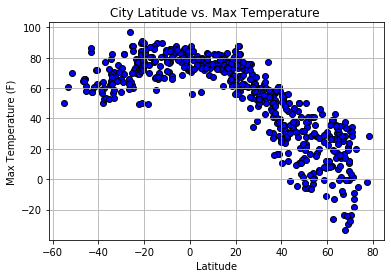

In [16]:
x_axis = clean_df["Lat"]
y_axis = clean_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature ")
plt.savefig("Images/LatitudeVtemp.png")
plt.show()

## Latitude vs. Humidity Plot

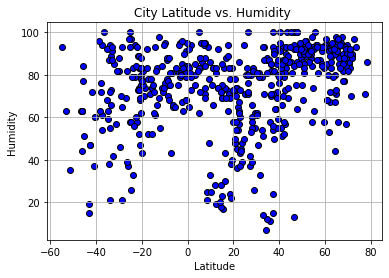

In [17]:
y_axis = clean_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity ")
plt.savefig("Images/LatitudeVhumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

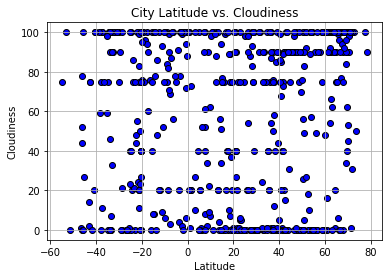

In [18]:
y_axis = clean_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.savefig("Images/LatitudeVcloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

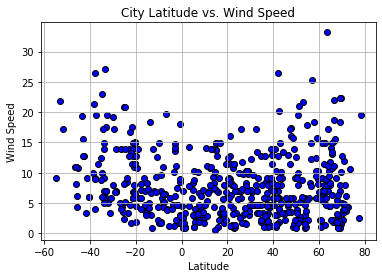

In [19]:
y_axis = clean_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("Images/LatitudeVwindSpeed.png")
plt.show()

## Linear Regression

In [24]:
df_north = clean_df.loc[clean_df["Lat"]>=0]
df_south = clean_df.loc[clean_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.74


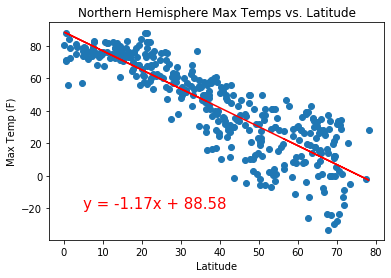

In [55]:
x_axis = df_north["Lat"]
y_axis = df_north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere Max Temps vs. Latitude")
plt.savefig("Images/LinReg Northern Hemisphere Max Temps vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.29


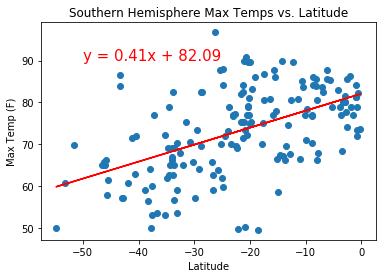

In [56]:
x_axis = df_south["Lat"]
y_axis = df_south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere Max Temps vs. Latitude")
plt.savefig("Images/LinReg Southern Hemisphere Max Temps vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.14


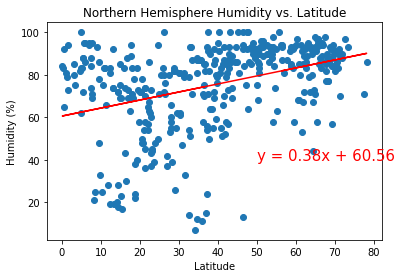

In [57]:
x_axis = df_north["Lat"]
y_axis = df_north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity vs. Latitude")
plt.savefig("Images/LinReg Northern Hemisphere Humidity vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.09


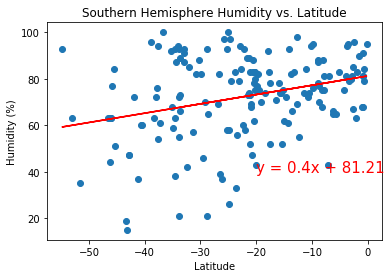

In [58]:
x_axis = df_south["Lat"]
y_axis = df_south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity vs. Latitude")
plt.savefig("Images/LinReg Southern Hemisphere Humidity vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.08


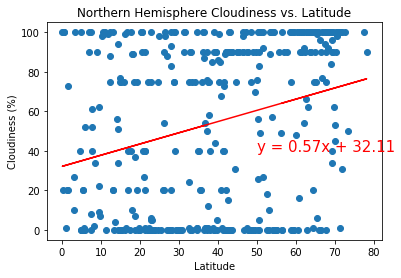

In [59]:
x_axis = df_north["Lat"]
y_axis = df_north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.savefig("Images/LinReg Northern Hemisphere Cloudiness vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.04


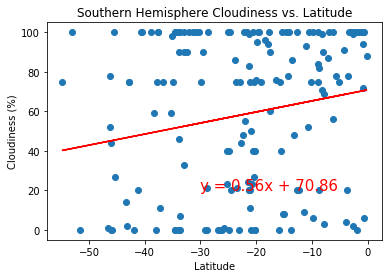

In [60]:
x_axis = df_south["Lat"]
y_axis = df_south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.savefig("Images/LinReg Southern Hemisphere Cloudiness vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.03


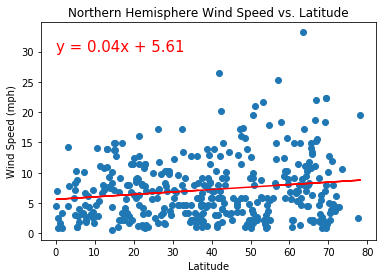

In [61]:
x_axis = df_north["Lat"]
y_axis = df_north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
plt.savefig("Images/LinReg Northern Hemisphere Wind Speed vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.12


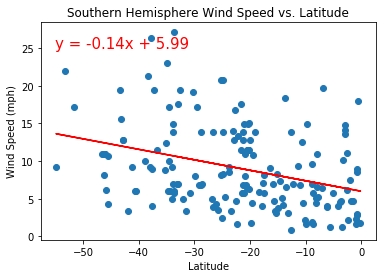

In [62]:
x_axis = df_south["Lat"]
y_axis = df_south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
plt.savefig("Images/LinReg Southern Hemisphere Wind Speed vs. Latitude.png")
plt.show()